<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/ex01/marcus_borela/Exerc%C3%ADcios_Sele%C3%A7%C3%A3o_IA025_202201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [1]:
print('Meu nome: Marcus Vinícius Borela de Castro')

Meu nome: Marcus Vinícius Borela de Castro


# Parte 1:

##Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e `random`. Também pode-se usar o NumPy.

##Exercício 1.1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

In [ ]:
import numpy as np
from collections import Counter

In [ ]:
def top_k(L, k):
    # Escreva aqui o código
    return dict(Counter(L).most_common(k))

Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [ ]:
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L, k=k)
print(f'resultado: {resultado}')

resultado: {'a': 4, 'd': 3, 'e': 3}


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [ ]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000

In [ ]:
%%timeit
resultado = top_k(L=L, k=k)

1 loop, best of 5: 427 ms per loop


## Exercício 1.2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

In [ ]:
import re

In [ ]:
def tokens_to_ids(text, vocabulary):
    return [vocabulary[palavra] if palavra in vocabulary else vocabulary['unknown'] for palavra in re.findall(r"\w+|[^\s\w]",text.lower(), re.IGNORECASE) ]

Mostre que sua implementação esta correta com um exemplo pequeno:

---



In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

print(tokens_to_ids(D, V))

[1, 3, 2, 4, -1, 5]


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000 * ['Eu gosto de comer pizza.'])

In [ ]:
%%timeit
resultado = tokens_to_ids(D, V)

1 loop, best of 5: 1.98 s per loop


## Exercício 1.3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

In [ ]:
from time import time, strftime

In [ ]:
import io
print (io.DEFAULT_BUFFER_SIZE)

8192


In [ ]:
def get_blocks(files, size=65536):
  while True:
      b = files.read(size)
      if not b: break
      yield b

def retorna_num_linhas_arquivo(path:str) -> int:
  num_linhas = 0
  with open(path, "r",encoding="utf-8",errors='ignore') as f:
      num_linhas += sum(bl.count("\n") for bl in get_blocks(f))
  return num_linhas

 
def retorna_linhas_indicadas_de_arquivo(path:str, lista_indice_dist_uniforme:list, total_selecao, ordenada_por_posicao_arquivo:bool=False)-> list:
  lista_linhas_posicao_conteudo = []
  lista_conteudo = []
  cnt_linha_selecionada = 0
  lista_indice_ordenada = sorted(lista_indice_dist_uniforme)
  proxima_linha_selecionada = lista_indice_ordenada[cnt_linha_selecionada]
  # print(f"lista_indice_ordenada {lista_indice_ordenada}")
  
  for cnt_linha_lida, linha in enumerate(open(path, buffering=1)): # line buffering   
      # print(f"cnt_linha_lida: {cnt_linha_lida}") 
      while cnt_linha_lida == proxima_linha_selecionada: 
        lista_linhas_posicao_conteudo.append((lista_indice_dist_uniforme.index(proxima_linha_selecionada),linha))
        lista_conteudo.append(linha)
        cnt_linha_selecionada += 1
        if cnt_linha_selecionada == total_selecao:
          break
        else:
          proxima_linha_selecionada = lista_indice_ordenada[cnt_linha_selecionada]
          # print(f"proxima_linha_selecionada: {proxima_linha_selecionada} cnt_linha_selecionada: {cnt_linha_selecionada}")

  # print(f"len lista_linhas_posicao_conteudo {len(lista_linhas_posicao_conteudo)}")
  
  if not ordenada_por_posicao_arquivo:
    return [item[1] for item in sorted(lista_linhas_posicao_conteudo, key=lambda x: x[0])]
  else:
    return lista_conteudo


def sample(path: str, k: int, ordenada_por_posicao_arquivo:bool=False):    
  num_linhas = retorna_num_linhas_arquivo(path)
  # print(f'num_linhas: {num_linhas} k: {k}')
  lista_indice_dist_uniforme = list(np.random.choice(num_linhas, k, replace=True))
  # print(f"len(lista_indice_dist_uniforme) {len(lista_indice_dist_uniforme)}")
  # print(lista_indice_dist_uniforme)
  return retorna_linhas_indicadas_de_arquivo(path, lista_indice_dist_uniforme, k, ordenada_por_posicao_arquivo)

Mostre que sua implementação está correta com um exemplo pequeno:

In [ ]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

samples = sample(path=filename, k=n_samples)
print(samples)
print(len(samples) == n_samples)

['line 8\n', 'line 38\n', 'line 81\n', 'line 98\n', 'line 61\n', 'line 56\n', 'line 83\n', 'line 7\n', 'line 54\n', 'line 31\n']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [ ]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

1 loop, best of 5: 1.11 s per loop


# Parte 2:

##Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

##Exercício 2.1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?

Resposta:

- número de somas: m*p*(n - 1) = m*p*n - m*p
  
   Explicação: nova matriz vai ter mxp e para cada célula houve (n - 1) adições

- número de multiplicações: m*p*n = m*p*n  
  
   Explicação: nova matriz vai ter mxp e para cada célula houve n multiplicações

Flops total: multiplicação + adição = 
     mpn + (mpn - mp) = 2mpn - mp = mp(2n - 1)



## Exercício 2.2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [ ]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
np.mean(A, axis=1)

array([ 2.5,  8.5, 14.5, 20.5])

## Exercício 2.3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [ ]:
C = (A - A.min()) / A.max() - A.min()
print(C)

[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 2.4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [ ]:
(A - A.min(axis=0)) / (A.max(axis=0) - A.min(axis=0))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
        0.33333333],
       [0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
        0.66666667],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]])

## Exercício 2.5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas.


In [ ]:
A.min(axis=1,  keepdims = True)

array([[ 0],
       [ 6],
       [12],
       [18]])

In [ ]:
(A - A.min(axis=1,  keepdims = True)) / (A.max(axis=1, keepdims = True) - A.min(axis=1, keepdims = True))

array([[0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ]])

## Exercício 2.6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em apredizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

In [ ]:
import numpy as np


def softmax(A):
    '''
    Aplica a função de softmax à matriz `A`.

    Entrada:
      `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
      independentemente e N é o tamanho de cada exemplo.
    
    Saída:
      Uma matriz M x N, onde a soma de cada linha é igual a um.
    '''
    MAX_por_linha = np.transpose(np.full((A.shape[1], A.shape[0]), A.max(axis=1)))    
    # print("MAX_por_linha", MAX_por_linha)
    # print("A - MAX_por_linha", A - MAX_por_linha)
    matriz_sem_valor_alto = np.exp(A - MAX_por_linha)
    # print("matriz_sem_valor_alto", matriz_sem_valor_alto)
    SOMA_por_linha = np.transpose(np.full((A.shape[1], A.shape[0]), matriz_sem_valor_alto.sum(axis=1)))
    # print("SOMA_por_linha", SOMA_por_linha)
    return matriz_sem_valor_alto / SOMA_por_linha



Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [ ]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.        , 0.        , 1.        ],
       [0.04861082, 0.35918811, 0.59220107]])

O código a seguir verifica se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [ ]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [ ]:
%%timeit
softmax(A)

1 loop, best of 5: 424 ms per loop


In [ ]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 2.7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1

Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [ ]:
def one_hot(y:[int], n_classes:int)-> list:
  one_hot_encode = np.zeros((len(y), n_classes))
  for idx, val in enumerate(y):
    one_hot_encode[idx, val] = 1
  return one_hot_encode  

In [ ]:
N_CLASSES = 9
N_SAMPLES = 10
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)
print(y)
print(one_hot(y, N_CLASSES))

[8 8 3 6 6 2 3 2 3 2]
[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
%%timeit
one_hot(y, N_CLASSES)

1 loop, best of 5: 118 ms per loop


## Exercício 2.8

Implemente uma classe que normalize um array de pontos flutuantes `array_a` para a mesma média e desvio padrão de um outro array `array_b`, conforme exemplo abaixo:
```
array_a = np.array([-1, 1.5, 0])
array_b = np.array([1.4, 0.8, 0.3, 2.5])
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)  # Deve imprimir [0.3187798  2.31425165 1.11696854]
```

In [ ]:
class Normalizer:
    def __init__(self, base):
        b = np.array(base)
        self.m = b.mean()
        self.s = b.std()
    def __call__(self, array):
        b = np.array(array)
        m = b.mean()
        s = b.std()
        return (b - m) * self.s / s + self.m

Mostre que seu código está correto com o exemplo abaixo:

In [ ]:
array_a = [-1, 1.5, 0]
array_b = [1.4, 0.8, 0.3, 2.5]
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)

[0.3187798  2.31425165 1.11696854]


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [ ]:
import torch

In [ ]:
torch.__version__

'1.10.0+cu111'

**Tensor com atributo .requires_grad=True**

Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [ ]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [ ]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [ ]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

## Forward pass

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [ ]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)
e2 = e.pow(2) ; print('e2 =', e2)
J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Backward pass

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [ ]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [ ]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [ ]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])


##Exercício 3.1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [ ]:
def J_func(w, x, y):
    return (np.multiply(w, x) - y).pow(2).sum()

# Calcule o gradiente usando a regra diferenças finitas
# Confira com o valor já calculado anteriormente
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
dw = 0.1
print(dw)
print(f'J_func(w) {J_func(w,x,y)}; f_func(w+dw) {J_func(w+dw, x, y)}; f_func(w-dw) {J_func(w-dw, x, y)}')
grad = (J_func(w+dw, x, y) - J_func(w-dw, x, y)) / (2 * dw)
print('grad=', grad)

0.1
J_func(w) 14.0; f_func(w+dw) 11.339998245239258; f_func(w-dw) 16.94000244140625
grad= tensor(-28.0000)


##Exercício 3.2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

In [ ]:
import matplotlib.pyplot as plt


i = 0 J= 14.0 grad = -28.00002098083496 w =tensor([1.2800])

i = 1 J= 7.257596015930176 grad = -20.16000747680664 w =tensor([1.4816])

i = 2 J= 3.762335777282715 grad = -14.5152006149292 w =tensor([1.6268])

i = 3 J= 1.950394630432129 grad = -10.450942039489746 w =tensor([1.7313])

i = 4 J= 1.0110836029052734 grad = -7.524674892425537 w =tensor([1.8065])

i = 5 J= 0.5241460204124451 grad = -5.41776704788208 w =tensor([1.8607])

i = 6 J= 0.2717174291610718 grad = -3.900789976119995 w =tensor([1.8997])

i = 7 J= 0.14085820317268372 grad = -2.808570146560669 w =tensor([1.9278])

i = 8 J= 0.07302085310220718 grad = -2.0221707820892334 w =tensor([1.9480])

i = 9 J= 0.03785398602485657 grad = -1.455962896347046 w =tensor([1.9626])

i = 10 J= 0.019623516127467155 grad = -1.0482927560806274 w =tensor([1.9730])

i = 11 J= 0.010172825306653976 grad = -0.7547721266746521 w =tensor([1.9806])

i = 12 J= 0.005273588001728058 grad = -0.5434329509735107 w =tensor([1.9860])

i = 13 J= 0.00273383501917

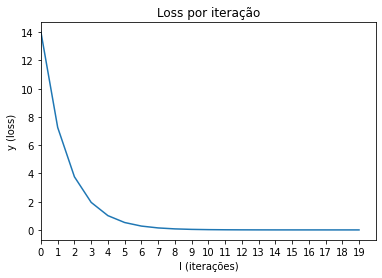

In [ ]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)

perdas = []
for i in range(iteracoes):
    print()
    J = J_func(w, x, y)
    grad = (J_func(w+dw, x, y) - J_func(w-dw, x, y)) / (2 * dw)
    w = w - learning_rate * grad
    print(f'i = {i} J= {J} grad = {grad} w ={w}')
    perdas.append(J)

# Plote o gráfico da loss J pela iteração i
plt.plot(range(20), perdas) 
plt.xlabel('I (iterações)')
plt.xticks(range(20))
plt.ylabel('y (loss)')
plt.xlim(0,20)
plt.title('Loss por iteração')
plt.show()

##Exercício 3.3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


In [ ]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)


# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)
e = y_pred - y
e2 = e.pow(2) 
J = e2.sum()  

e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

if w.grad: w.grad.zero_()
perdas = []

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)


In [ ]:
J.backward(retain_graph=True)

In [ ]:
print(w.grad)

tensor([-28.])


w =tensor([1.5600], requires_grad=True)
i = 0 J= 14.0 grad = tensor([-56.]) w =tensor([1.5600], requires_grad=True)
w =tensor([1.6832], requires_grad=True)
i = 1 J= 2.7104005813598633 grad = tensor([-12.3200]) w =tensor([1.6832], requires_grad=True)
w =tensor([1.7719], requires_grad=True)
i = 2 J= 1.4050711393356323 grad = tensor([-8.8704]) w =tensor([1.7719], requires_grad=True)
w =tensor([1.8358], requires_grad=True)
i = 3 J= 0.7283890247344971 grad = tensor([-6.3867]) w =tensor([1.8358], requires_grad=True)
w =tensor([1.8818], requires_grad=True)
i = 4 J= 0.37759679555892944 grad = tensor([-4.5984]) w =tensor([1.8818], requires_grad=True)
w =tensor([1.9149], requires_grad=True)
i = 5 J= 0.1957462579011917 grad = tensor([-3.3109]) w =tensor([1.9149], requires_grad=True)
w =tensor([1.9387], requires_grad=True)
i = 6 J= 0.10147492587566376 grad = tensor([-2.3838]) w =tensor([1.9387], requires_grad=True)
w =tensor([1.9559], requires_grad=True)
i = 7 J= 0.052604615688323975 grad = tensor

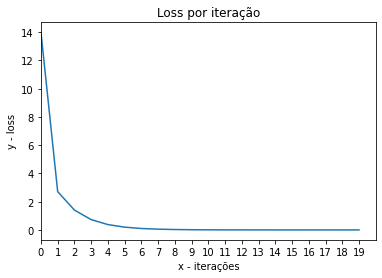

In [ ]:


for i in range(iteracoes):
  loss = J_func(w.detach().numpy() , x, y)
  perdas.append(loss)
  y_pred = x * w; 
  e = y_pred - y
  e2 = e.pow(2) 
  J = e2.sum()  
  J.backward()
  grad = w.grad
  with torch.no_grad():
    w -= learning_rate * w.grad
  # w = w - learning_rate * grad
  print(f'w ={w}')
  print(f'i = {i} J= {J} grad = {grad} w ={w}')
  w.grad.zero_()


# Plote o gráfico da loss J pela iteração i
plt.plot(range(20), perdas) 
plt.xlabel('x - iterações')
plt.xticks(range(20))
plt.ylabel('y - loss')
plt.xlim(0,20)
plt.title('Loss por iteração')
plt.show()

##Exercício 3.4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

Resposta:
Precisamos fazer o dw tender a zero para que teoricamente tenhamos a própria fórmula da derivada:

<a href="https://www.codecogs.com/eqnedit.php?latex=\lim_{dw\rightarrow&space;0}&space;\frac{y_{i&plus;1}&space;-&space;y_i}{dw}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\lim_{dw\rightarrow&space;0}&space;\frac{y_{i&plus;1}&space;-&space;y_i}{dw}" title="\lim_{dw\rightarrow 0} \frac{y_{i+1} - y_i}{dw}" /></a>

Mas, se o valor de dw for muito pequeno, o erro ao calcular a aproximação numérica cresce (devido aos erros de arredondamento para a representação numérica computacional). Ver só uma ilustração no gráfico abaixo:

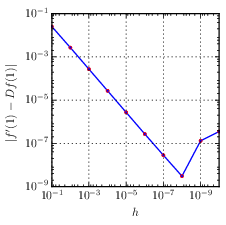

Gráfico 1 – Diferença entre derivada real e estimada a partir de dw (h) (fonte: figura 8.1 em https://www.ufrgs.br/reamat/CalculoNumerico/livro-oct/dn-diferencas_finitas.html )
 
Isso nos motiva a procurar o valor ótimo de dw que minimiza o erro. 
Um procedimento simples para se resolver esse problema seria atribuir a dw valores gradativamente menores. A partir de um determinado ponto as soluções obtidas serão muito parecidas, sendo que uma maior redução em dw a partir deste ponto não irá reduzir o erro global de forma signicativa e irá aumentar o erro de arredondamento.

Obs.: se for o caso, a depender da função alvo, talvez seja necessária uma avaliação mais aprofundada para o valor de dw e para o cálculo da derivada aproximada em duas situações:

. nos pontos de platô do gráfico (derivada = 0): a diferença entre y(x+dw) e y(x-dw) tende a ser zero;

. nos pontos de descontinuidades (não é o caso da loss da questão anterior): o cálculo pode possuir comportamento oscilatório nas vizinhanças dessas descontinuidades.




##Exercício 3.5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



Resposta (justifique):

a) $O(N^2)$ - quadrática: pois o cálculo de f que é O(N) precisa ser executado N vezes, para cada dimensão em w:
 f(w1+epsilon,w2,w3,...), f(w1,w2+epsilon,w3,...), etc

b) $O(N)$ - linear: pois cada peso w precisa ser "visitado" pelo menos uma vez. Fonte: https://towardsdatascience.com/back-propagation-demystified-in-7-minutes-4294d71a04d7 :: Complexity of Back Propagation.



##Exercício 3.6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate

Resposta:

Sendo aleatória a inicialização, há uma tendência de que haja uma distribuição equilibrada entre as classes, o que levaria a uma entropia de uma distribuição "meio a meio", dada pela fórmula:

$$L = \log K $$

Fonte: https://medium.com/ensina-ai/uma-explica%C3%A7%C3%A3o-visual-para-fun%C3%A7%C3%A3o-de-custo-binary-cross-entropy-ou-log-loss-eaee662c396c :: fórmula para Entropia de uma distribuição meio a meio



Considerando que será 1/k em cada classe (só para o começo do algoritmo): 

- log 1/k = log k





Fim do notebook.